In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import datetime
%matplotlib inline

# data_dir = '/Users/SY/Desktop/obic/data/'
data_dir = '/Users/dengdingshan/Documents/data/obic/'

# 双色图

In [3]:
starcatalog_fram = pd.read_csv(data_dir + 'New/LMOBV4-Panstarr.csv')
df = starcatalog_fram

In [11]:
sfd = df[df['SFD_ebv']<0.05]
abnormalsfd = sfd[(sfd['GBP']-sfd['GRP'])>0.2]

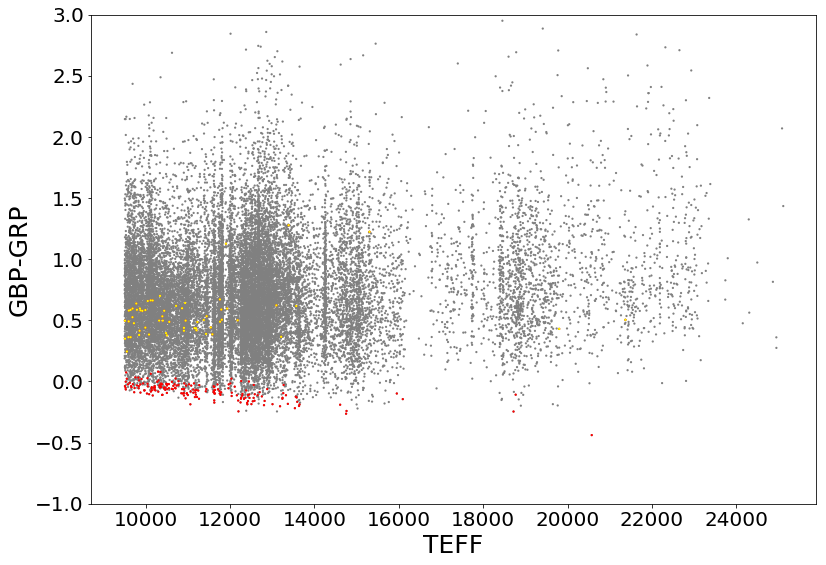

In [13]:
# stract out the abnormal SFD sources
plt.figure(figsize=(13,9))
plt.xlabel('TEFF',fontsize=25)
plt.ylabel('GBP-GRP',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(df['TEFF'],df['GBP']-df['GRP'],\
           c = 'gray',s = 5, edgecolors = 'None')
plt.scatter(sfd['TEFF'],sfd['GBP']-sfd['GRP'],\
           c = 'red',s = 5, edgecolors = 'None')
plt.scatter(abnormalsfd['TEFF'],abnormalsfd['GBP']-abnormalsfd['GRP'],\
           c = 'yellow',s = 5, edgecolors = 'None')

# plt.xlim([10000,25000])
plt.ylim([-1,3])
# plt.savefig(data_dir+'pictures/'+'_all.png',dpi = 200)

plt.show()

In [19]:
df_o = starcatalog_fram
df = df_o
df_o.columns

Index(['col1', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG', 'FEH',
       'ERR_FEH', 'SFD_ebv', 'l', 'b', 'J', 'ERR_J', 'H', 'ERR_H', 'KS',
       'ERR_KS', 'W1', 'ERR_W1', 'W2', 'ERR_W2', 'GMAG_gaia', 'GBP', 'GRP',
       'objID', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng',
       'f_objID', 'Qual', 'Epoch', 'Ns', 'Nd', 'gmag', 'e_gmag', 'gKmag',
       'e_gKmag', 'gFlags', 'rmag', 'e_rmag', 'rKmag', 'e_rKmag', 'rFlags',
       'imag', 'e_imag', 'iKmag', 'e_iKmag', 'iFlags', 'zmag', 'e_zmag',
       'zKmag', 'e_zKmag', 'zFlags', 'ymag', 'e_ymag', 'yKmag', 'e_yKmag',
       'yFlags', 'angDist'],
      dtype='object')

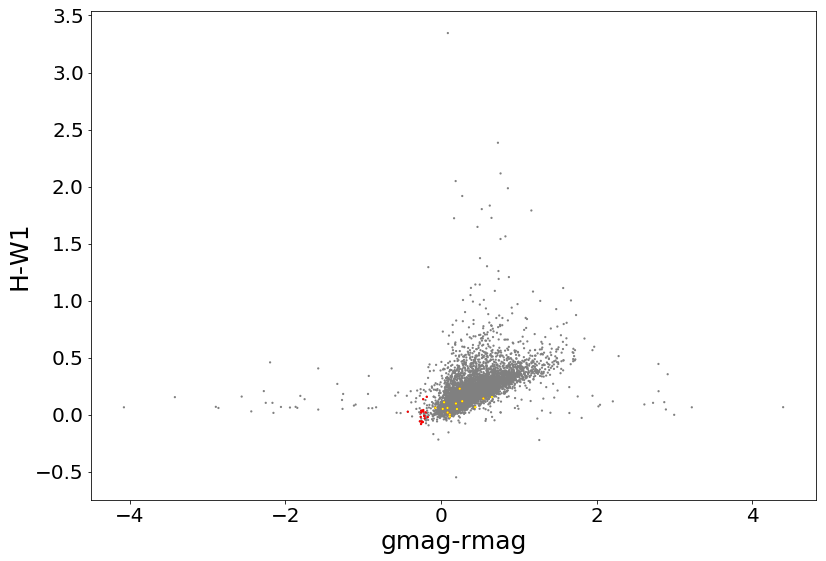

In [47]:
# the general code for CCD
# define the colors; ERR for 2MASS; e for panstar
c11 = 'gmag'; ec11='e_'+c11 #ec11='ERR_'+c11
c12 = 'rmag'; ec12='e_'+c12 #ec12='ERR_'+c12
c21 = 'H'; ec21='ERR_'+c21
c22 = 'W1'; ec22='ERR_'+c22

# df_o is the origin catalog
df = df_o[(df_o[c11]!=0) & (df_o[c12]!=0)]
df = df[(df[c21]!=0) & (df[c22]!=0)]

df = df[(df[ec11]>0)&(df[ec12]>0)]
df = df[(df[ec11]<0.02)&(df[ec12]<0.02)]

df = df[(df[ec21]>0)&(df[ec22]>0)]
df = df[(df[ec21]<0.2)&(df[ec22]<0.2)]

# SFD source
sfd = df[df['SFD_ebv']<0.05]
abnormalsfd = sfd[(sfd['GBP']-sfd['GRP'])>0.2]

# C-C diagram
plt.figure(figsize=(13,9))
plt.xlabel(c11+'-'+c12,fontsize=25)
plt.ylabel(c21+'-'+c22,fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(df[c11]-df[c12],df[c21]-df[c22],\
           c = 'gray',s = 5, edgecolors = 'None')
plt.scatter(sfd[c11]-sfd[c12],sfd[c21]-sfd[c22],\
           c = 'red',s = 5, edgecolors = 'None')
plt.scatter(abnormalsfd[c11]-abnormalsfd[c12],abnormalsfd[c21]-abnormalsfd[c22],\
           c = 'yellow',s = 5, edgecolors = 'None')


plt.savefig(data_dir+'pictures/'+c11+c12+c21+c22+'.png',dpi = 200)
# plt.ylim([-1,3])
# plt.xlim([-0.5,1.5])
plt.show()

In [26]:
incorrect_source=df[(df[c21]-df[c22])>4]

In [33]:
incorrect_source.to_csv(data_dir+'incin_gaia.csv')

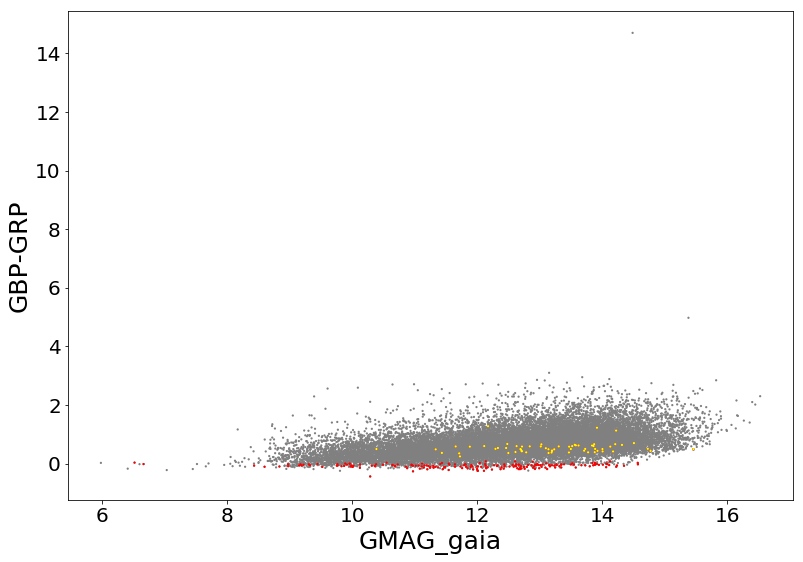

In [17]:
# C-C diagram
plt.figure(figsize=(13,9))
plt.xlabel('GMAG_gaia',fontsize=25)
plt.ylabel('GBP-GRP',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(df['GMAG_gaia'],df['GBP']-df['GRP'],\
           c = 'gray',s = 5, edgecolors = 'None')
plt.scatter(sfd['GMAG_gaia'],sfd['GBP']-sfd['GRP'],\
           c = 'red',s = 5, edgecolors = 'None')
plt.scatter(abnormalsfd['GMAG_gaia'],abnormalsfd['GBP']-abnormalsfd['GRP'],\
           c = 'yellow',s = 5, edgecolors = 'None')

# plt.ylim([-1,3])
# plt.savefig(data_dir+'pictures/'+'_all.png',dpi = 200)
# plt.xlim([-0.5,1.5])
plt.show()

# 0812研究galex到底10000K左右的位置出现了什么问题

In [119]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_galex_ais_0812.csv')

In [120]:
df = starcatalog_fram

In [121]:
df=df[(df['fuv_magerr'] <=0.2)]
df=df[(df['fuv_mag'] >=14)]

In [122]:
df_nice = df[df['fuv_mag'].notnull()]

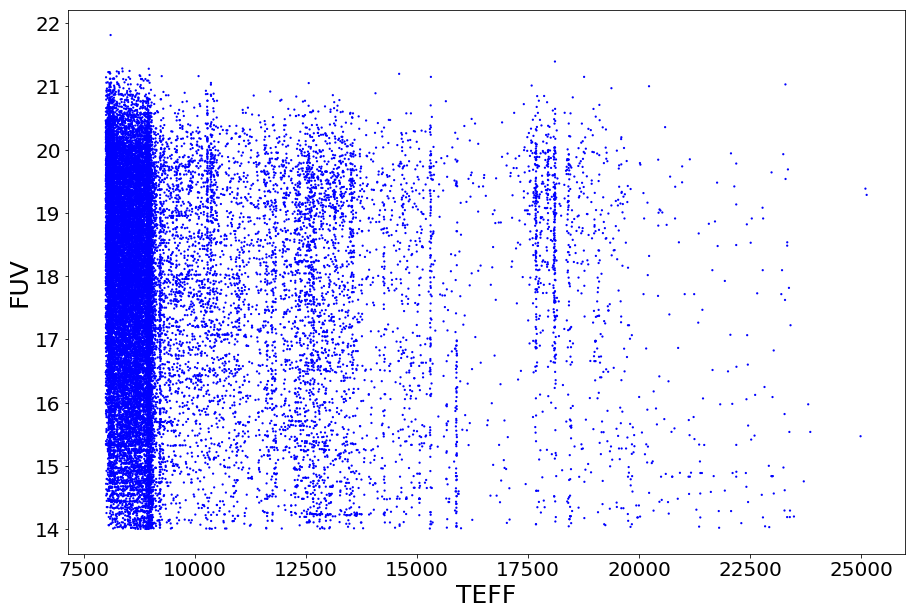

In [123]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF',fontsize=25)
plt.ylabel('FUV',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# cm = plt.cm.get_cmap('gray')

# sc = plt.scatter(df['RA'],df['DEC'],\
#             c = 'red',s=3,edgecolors = 'None',cmap=cm,label = 'E(B-V) >= 0.05')

# clb = plt.colorbar(sc)
# clb.ax.set_title('SFD_ebv')

plt.scatter(df_nice['TEFF'],df_nice['fuv_mag'],\
           c = 'blue',s = 5, edgecolors = 'None')

# plt.scatter(starcatalog_fram[teff],starcatalog_fram[err_teff],\
#             c='red',s=5, edgecolors='None', alpha=0.5)

# plt.legend()
plt.savefig(data_dir+'pictures/'+'FUV_0818_all.png',dpi = 200)
plt.show()

# 0812研究只和sdss交叉的具体的分布情况

In [124]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_sdss_0812.csv')

In [125]:
df = starcatalog_fram

In [126]:
df=df[(df['e_gmag'] <=0.05)]
df=df[(df['gmag'] >=14)]

In [127]:
df.columns

Index(['col1', 'Unnamed: 0', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG',
       'ERR_LOGG', 'FEH', 'ERR_FEH', 'SFD_ebv', 'RAdeg', 'DEdeg', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'objID', 'mode', 'q_mode', 'class', 'SDSS12',
       'm_SDSS12', 'flags', 'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag',
       'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp',
       'f_zsp', 'zph', 'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE',
       'SpObjID', 'spType', 'spCl', 'subClass', 'angDist'],
      dtype='object')

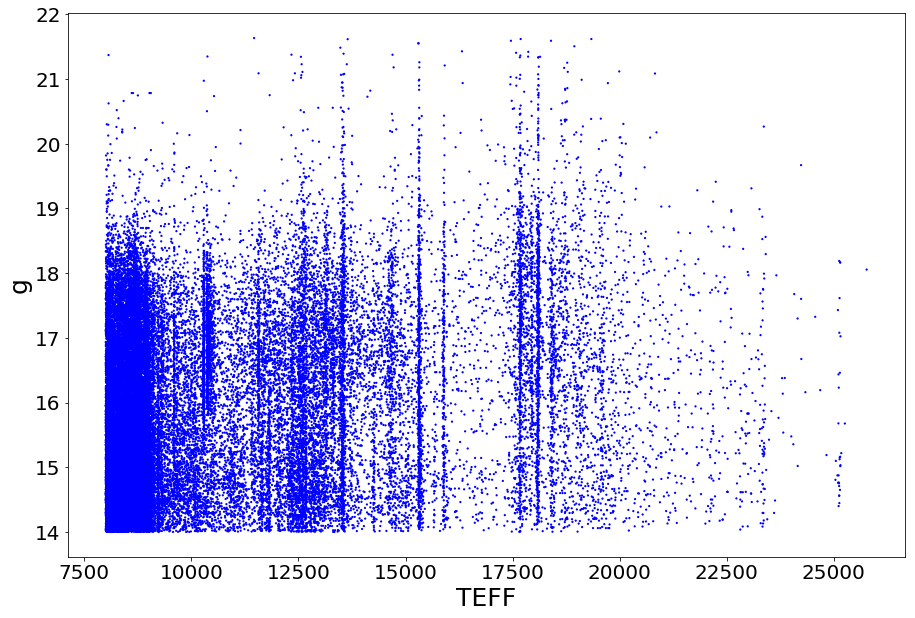

In [128]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF',fontsize=25)
plt.ylabel('g',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(df['TEFF'],df['gmag'],\
           c = 'blue',s = 5, edgecolors = 'None')

plt.savefig(data_dir+'pictures/'+'g_0812_all.png',dpi = 200)
plt.show()

# 0812研究FUV-g具体的情况

In [136]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_sdss_galex_0812.csv')

In [137]:
df = starcatalog_fram

In [138]:
df=df[((df['fuv_magerr'] <=0.2) &(df['e_gmag'] <=0.05))]
df=df[((df['gmag'] >=14)&(df['fuv_mag'] >=14))]

In [139]:
df.columns

Index(['col1', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG', 'FEH',
       'ERR_FEH', 'RAdeg', 'DEdeg', 'errHalfMaj', 'errHalfMin', 'errPosAng',
       'objID', 'mode', 'q_mode', 'class', 'SDSS12', 'm_SDSS12', 'flags',
       'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag',
       'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp', 'f_zsp', 'zph',
       'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'SpObjID',
       'spType', 'spCl', 'subClass', 'angDist', 'ra_x', 'dec_x', 'fuv_mag',
       'nuv_mag', 'fuv_magerr', 'nuv_magerr', 'objid_x', 'E_bv', 'objtype',
       'fuv_flux', 'fuv_fluxerr', 'nuv_flux', 'nuv_fluxerr', 'fuv_artifact',
       'nuv_artifact', 'angDist_x'],
      dtype='object')

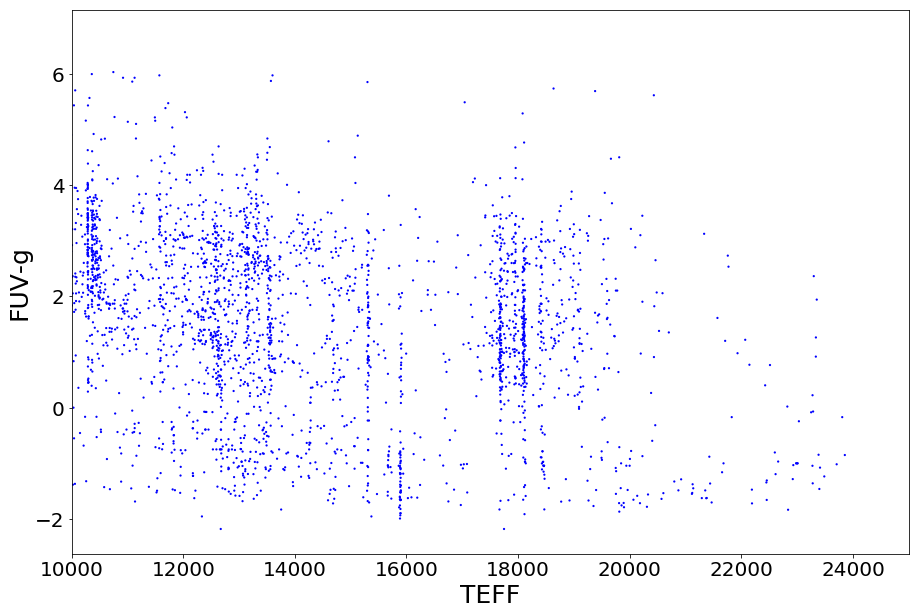

In [135]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF',fontsize=25)
plt.ylabel('FUV-g',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([10000,25000])
plt.scatter(df['TEFF_1'],df['fuv_mag']-df['gmag'],\
           c = 'blue',s = 5, edgecolors = 'None')

plt.savefig(data_dir+'pictures/'+'FUV_g_0818_all.png',dpi = 200)
plt.show()

# 0812研究new2的异常

In [185]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_sdss_galex_new2.csv')

In [217]:
df = starcatalog_fram

In [218]:
df=df[((df['fuv_magerr'] <=0.2)&(df['e_gmag'] <=0.05))]
df=df[((df['gmag'] >14)&(df['fuv_mag'] >14))]

In [219]:
df=df[(df['FEH']<0)]

In [220]:
df.columns

Index(['col1', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG', 'FEH',
       'ERR_FEH', 'RAdeg', 'DEdeg', 'errHalfMaj', 'errHalfMin', 'errPosAng',
       'objID', 'mode', 'q_mode', 'class', 'SDSS12', 'm_SDSS12', 'flags',
       'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag',
       'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp', 'f_zsp', 'zph',
       'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'SpObjID',
       'spType', 'spCl', 'subClass', 'angDist', 'ra_x', 'dec_x', 'fuv_mag',
       'nuv_mag', 'fuv_magerr', 'nuv_magerr', 'objid_x', 'E_bv', 'objtype',
       'fuv_flux', 'fuv_fluxerr', 'nuv_flux', 'nuv_fluxerr', 'fuv_artifact',
       'nuv_artifact', 'angDist_x'],
      dtype='object')

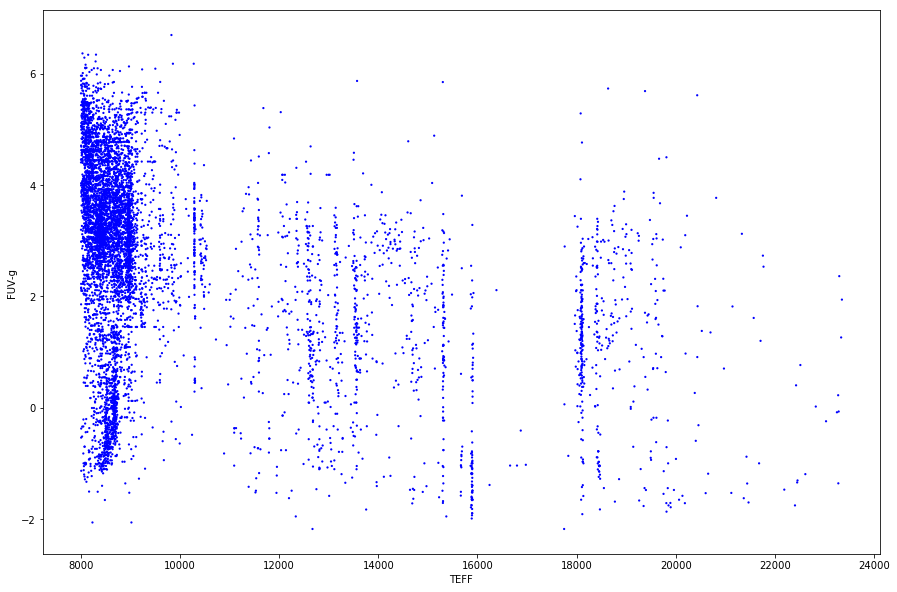

In [221]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF')
plt.ylabel('FUV-g')

plt.scatter(df['TEFF'],df['fuv_mag']-df['gmag'],\
           c = 'blue',s = 5, edgecolors = 'None')

plt.savefig(data_dir+'pictures/'+'FUV_g_0818_all_fehmin_new2.png',dpi = 200)
plt.show()

# Others

In [15]:
import astropy.coordinates as coord
import astropy.units as u

In [16]:
c1 = coord.ICRS(ra=89.014303*u.degree, dec=13.924912*u.degree)
gc1 = c1.transform_to(coord.Galactic)

In [17]:
l = []; b = [];
for j in range(len(df)):
    c1 = coord.ICRS(ra = df['RA'].values[j]*u.degree, dec = df['DEC'].values[j]*u.degree)
    gc1 = c1.transform_to(coord.Galactic)
    l.append(gc1.l.value)
    b.append(gc1.b.value)


In [18]:
df['l'] = np.array(l)
df['b'] = np.array(b)

/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
center_count = len([i for i in b if abs(i)<10])
center_count

1728

In [21]:
len(b)

4950

In [22]:
df_nice = df[df['SFD_ebv'] < 0.05]

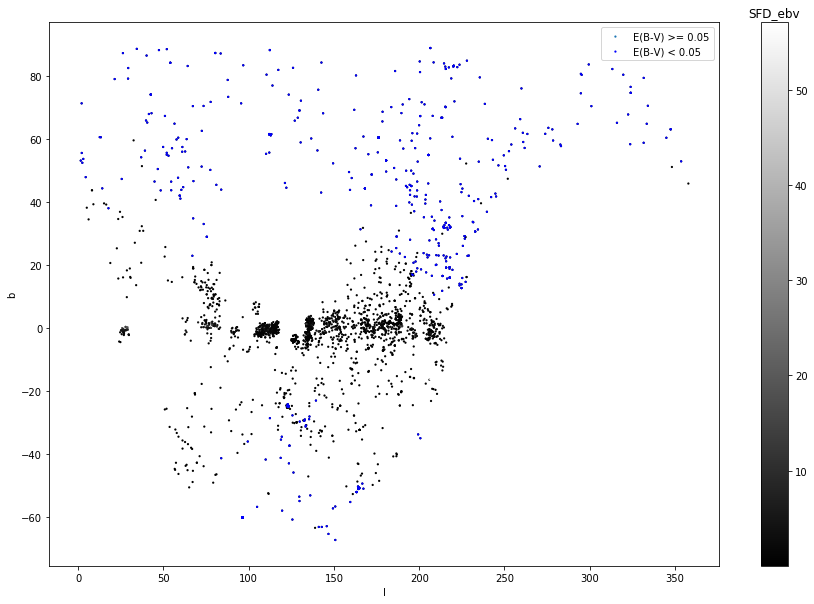

In [26]:
plt.figure(figsize=(15,10))
plt.xlabel('l')
plt.ylabel('b')

cm = plt.cm.get_cmap('gray')

sc = plt.scatter(df['l'],df['b'],\
            c = df['SFD_ebv'],s=5,edgecolors = 'None',cmap=cm,label = 'E(B-V) >= 0.05')

clb = plt.colorbar(sc)
clb.ax.set_title('SFD_ebv')

plt.scatter(df_nice['l'],df_nice['b'],\
           c = 'blue',s = 5, edgecolors = 'None',label = 'E(B-V) < 0.05')

# plt.scatter(starcatalog_fram[teff],starcatalog_fram[err_teff],\
#             c='red',s=5, edgecolors='None', alpha=0.5)

plt.legend()
plt.savefig('20000K_Galactic.png',dpi = 200)
plt.show()